# General Setup

In [1]:
%matplotlib widget

from pyCascade import probePost, physics, quantities
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

category =  "single_family"



In [2]:
############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/home/users/nbachand/Cascade/city_block_cfd'

# Run

In [3]:
run = 17
qois = ['comp(u,0)', 'comp(u,2)']

In [4]:
probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

In [10]:
stack = [1,2,3,6,10,30,40,100]

In [13]:
qty_dict = probes.create_qty_dict(
    names = ['col_3-6'],#[name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-40000:-1:],
    stack = stack,
)


processing data took 6 seconds


## Spectra

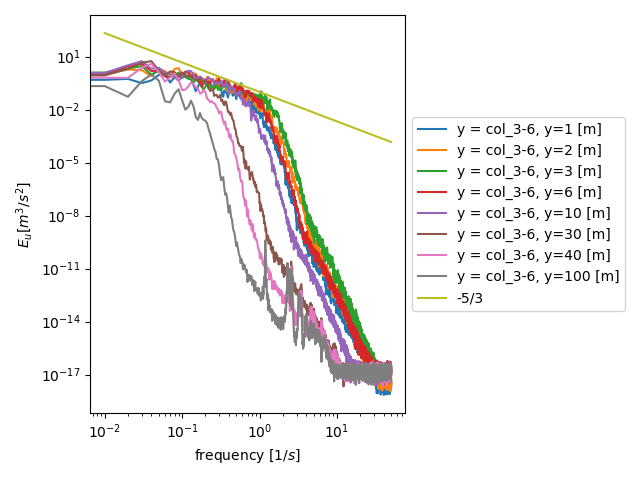

In [16]:
fig, ax = quantities.plot_power_spectra(qty_dict)

## Plot ABL

In [5]:
qty_dict = probes.create_qty_dict(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-40000:-1:],
    stack = np.arange(1,60)
)


processing data took 7 seconds
processing data took 8 seconds
processing data took 7 seconds
processing data took 7 seconds


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='mean velocity [m/s]', ylabel='height [m]'>)

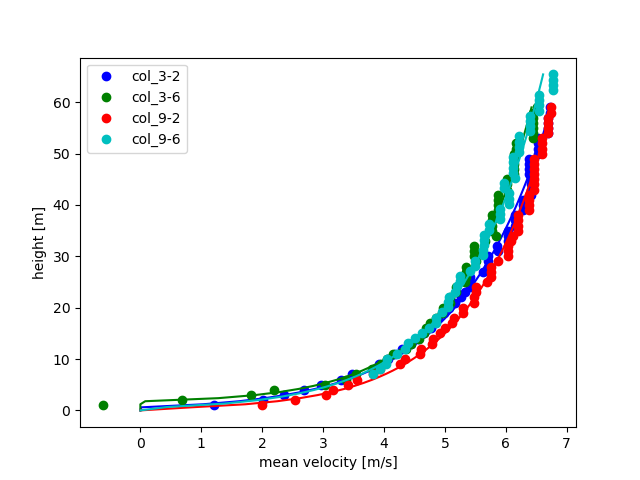

In [23]:
quantities.plot_ABL(qty_dict, fit_disp=True)

## Plot Length Scales

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: title={'center': 'Lx'}, xlabel='y [m]', ylabel='L [m]'>,
        <Axes: title={'center': 'Ly'}, xlabel='y [m]'>,
        <Axes: title={'center': 'Lz'}, xlabel='y [m]'>], dtype=object))

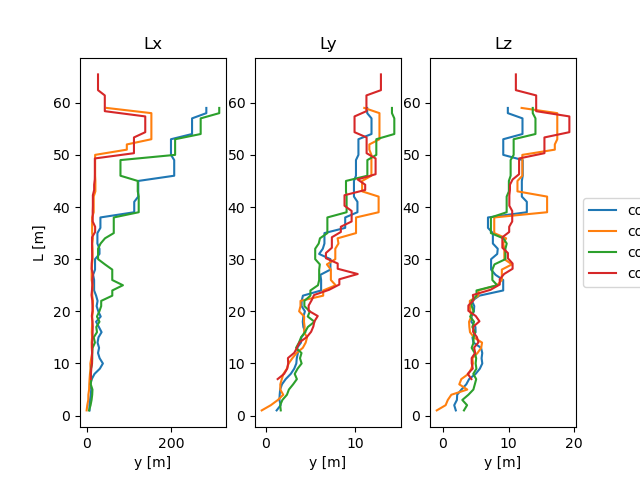

In [24]:
quantities.plot_length_scales(qty_dict)

## Plot Reynolds stresses

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: title={'center': 'uu'}, ylabel='y [m]'>,
         <Axes: title={'center': 'vv'}>, <Axes: title={'center': 'ww'}>],
        [<Axes: title={'center': 'uv'}, ylabel='y [m]'>,
         <Axes: title={'center': 'uw'}, xlabel='Reynolds Stress [m^2/s^2]'>,
         <Axes: title={'center': 'vw'}>]], dtype=object))

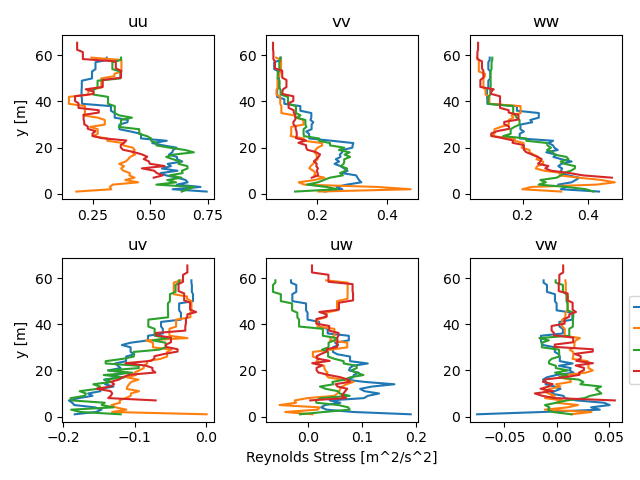

In [25]:
quantities.plot_reynolds_stresses(qty_dict)

## Plot Turbulence Intensities

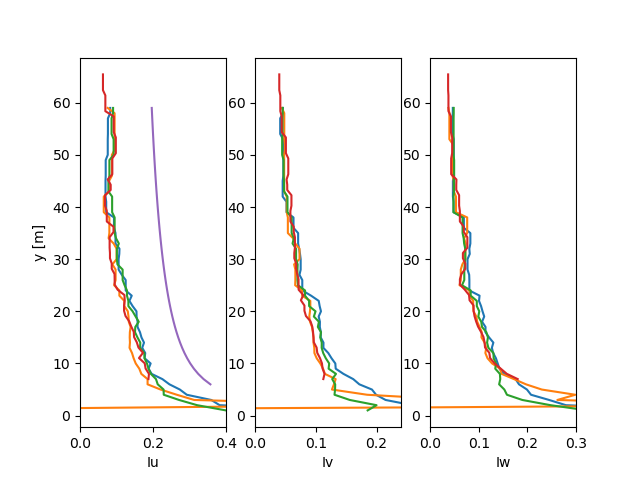

In [18]:
fig, ax = quantities.plot_turbulence_intensities(qty_dict)
ax[0].set_xlim(0,0.4)
ax[1].set_xlim(0,0.24)
ax[2].set_xlim(0,0.3)

z_0 = 0.061*6
yplot = np.arange(6,60)
ax[0].plot(1/np.log(yplot/z_0), yplot)
ax[1].plot(1/np.log(yplot/z_0), yplot) 
ax[2].plot(1/np.log(yplot/z_0), yplot) 

plt.legend()


## Plot prms

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Prms [Pa]', ylabel='y [m]'>)

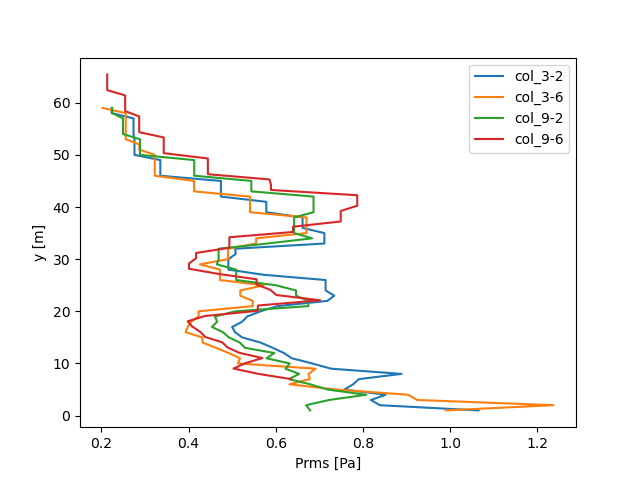

In [6]:
quantities.plot_prms(qty_dict)